# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pickle
import time
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
from tensorflow.keras.layers import Dense, LSTM, GRU, MaxPool1D, SimpleRNN, Flatten, Dropout, Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [15]:
df_train_full = pd.read_csv("KDDTrain+.txt")

# Labelling the dataset

In [16]:
NSL_KDD_columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class', 'classnum']

In [17]:
df_train_full.columns = NSL_KDD_columns

In [18]:
df_train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [19]:
df_train_full.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [20]:
df_train_full.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [21]:
NSL_KDD_columns_categorical = ['protocol_type', 'service', 'flag', 'class']

NSL_KDD_columns_int = ['duration',  'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count',  'dst_host_count',
       'dst_host_srv_count',   'classnum']

NSL_KDD_columns_float = ['serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
        'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_same_srv_rate',
        'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
        'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
        'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
        'dst_host_srv_rerror_rate']

# Data visualization

**Categorical Features**

<Axes: xlabel='protocol_type', ylabel='occurances'>

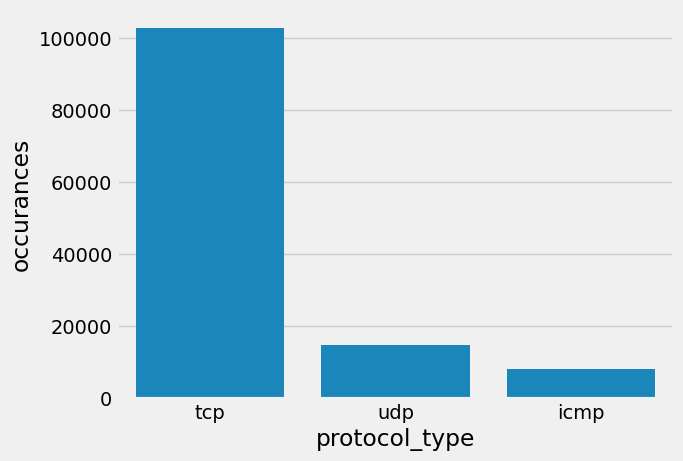

In [25]:
# categorical feature 'protocol_type'
temp = df_train_full['protocol_type'].value_counts()
a = temp.index
b = temp.values
zipped = list(zip(a, b))
d = pd.DataFrame(zipped, columns=['protocol_type', 'occurances'])
sns.barplot(data=d, x='protocol_type', y='occurances')

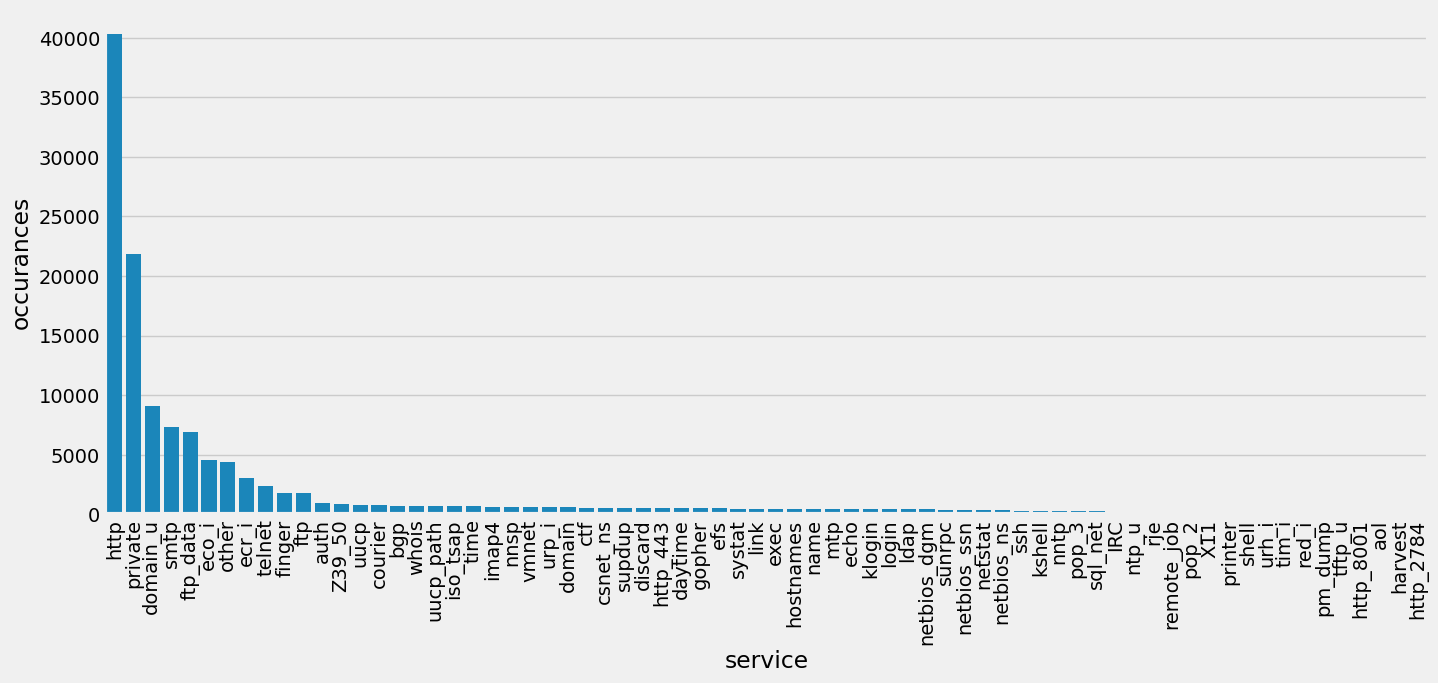

In [26]:
# categorical feature 'service'
temp = df_train_full['service'].value_counts()
a = temp.index
b = temp.values
zipped = list(zip(a, b))
d = pd.DataFrame(zipped, columns=['service', 'occurances'])
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=d, x='service', y='occurances')
fig.tight_layout()
plt.xticks(rotation=90)
plt.show()
#ax.set_xlabel()
#ax.set_ylabel()

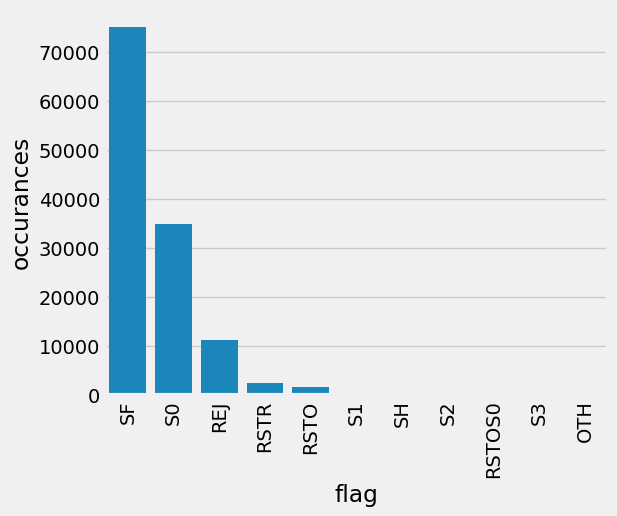

In [27]:
# categorical feature 'flag'
temp = df_train_full['flag'].value_counts()
a = temp.index
b = temp.values
zipped = list(zip(a, b))
d = pd.DataFrame(zipped, columns=['flag', 'occurances'])
fig, ax = plt.subplots()
sns.barplot(data=d, x='flag', y='occurances')
fig.tight_layout()
plt.xticks(rotation=90)
plt.show()

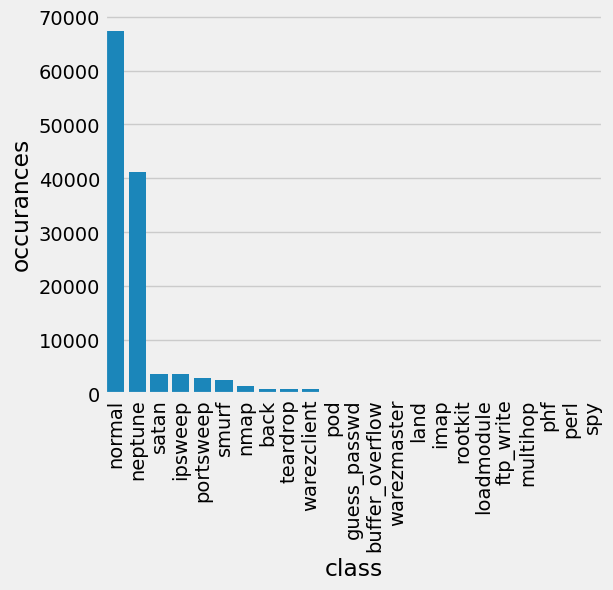

In [28]:
# categorical feature 'class'
temp = df_train_full['class'].value_counts()
a = temp.index
b = temp.values
zipped = list(zip(a, b))
d = pd.DataFrame(zipped, columns=['class', 'occurances'])
fig, ax = plt.subplots()
sns.barplot(data=d, x='class', y='occurances')
fig.tight_layout()
plt.xticks(rotation=90)
plt.show()

**Integer Type Features**

In [29]:
print(df_train_full[NSL_KDD_columns_int].nunique())

duration              2981
src_bytes             3341
dst_bytes             9326
land                     2
wrong_fragment           3
urgent                   4
hot                     28
num_failed_logins        6
logged_in                2
num_compromised         88
root_shell               2
su_attempted             3
num_root                82
num_file_creations      35
num_shells               3
num_access_files        10
num_outbound_cmds        1
is_host_login            2
is_guest_login           2
count                  512
srv_count              509
dst_host_count         256
dst_host_srv_count     256
classnum                22
dtype: int64


In [30]:
# int type features - candidate for OneHotEncoding
list1 = ['land', 'wrong_fragment', 'urgent', 'num_failed_logins',
         'logged_in', 'root_shell', 'su_attempted', 'num_shells',
         'num_outbound_cmds', 'is_host_login', 'is_guest_login']


# int type features having highly diverse values
list2 = ['duration', 'src_bytes','dst_bytes', 'hot',
         'num_compromised', 'num_root', 'num_file_creations',
         'num_access_files', 'count', 'srv_count', 'dst_host_count',
         'dst_host_srv_count', 'classnum']



In [31]:
# Those int type features which are candidate for OneHotEncoding

for i in list1:
    print('feature name:',i,'\n', df_train_full[i].value_counts(ascending=False), '\n\n\n')

feature name: land 
 0    125947
1        25
Name: land, dtype: int64 



feature name: wrong_fragment 
 0    124882
3       884
1       206
Name: wrong_fragment, dtype: int64 



feature name: urgent 
 0    125963
1         5
2         3
3         1
Name: urgent, dtype: int64 



feature name: num_failed_logins 
 0    125850
1       104
2         9
3         5
4         3
5         1
Name: num_failed_logins, dtype: int64 



feature name: logged_in 
 0    76120
1    49852
Name: logged_in, dtype: int64 



feature name: root_shell 
 0    125803
1       169
Name: root_shell, dtype: int64 



feature name: su_attempted 
 0    125892
2        59
1        21
Name: su_attempted, dtype: int64 



feature name: num_shells 
 0    125925
1        42
2         5
Name: num_shells, dtype: int64 



feature name: num_outbound_cmds 
 0    125972
Name: num_outbound_cmds, dtype: int64 



feature name: is_host_login 
 0    125971
1         1
Name: is_host_login, dtype: int64 



feature name: is_guest

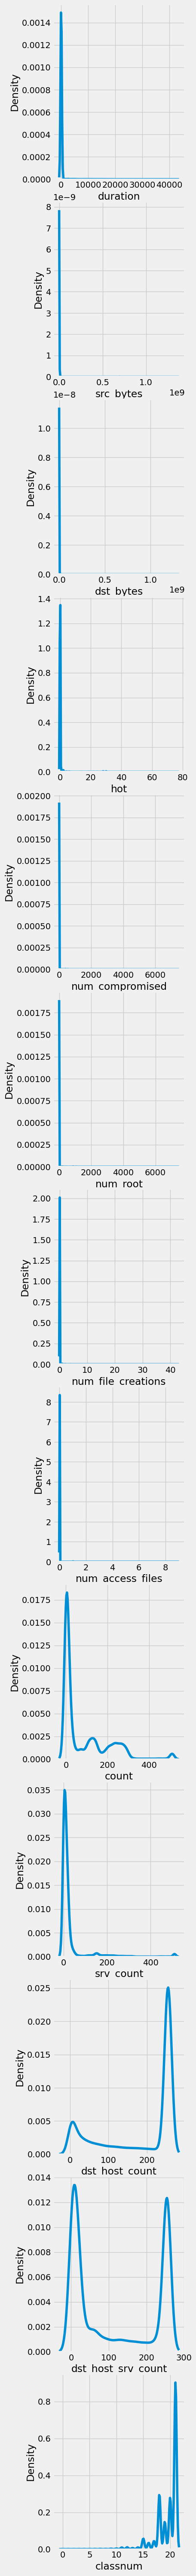

In [32]:
# highly skewed values - candidate for LogTransformation
# except 'dst_host_srv_count' all features are skewed. This feature is bi-modal.
temp = df_train_full[list2]
fig, ax = plt.subplots(13, 1, figsize=(4, 60))
fig.tight_layout()
for i, j in enumerate (list2):
    sns.kdeplot(ax=ax[i], data=temp, x=j)
plt.show()

**Float Type Features**

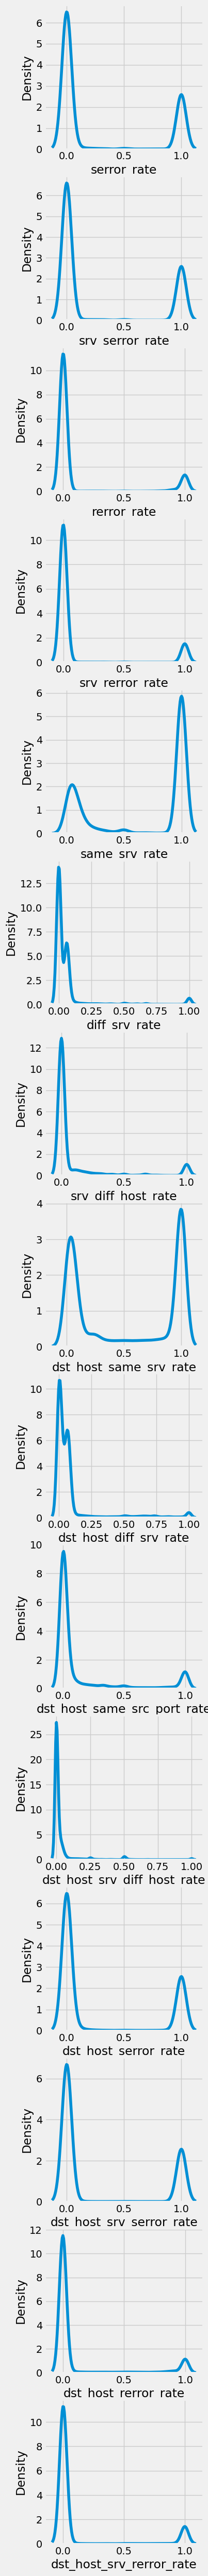

In [33]:
# multi-modal values (dominantly bi-mondal)
fig, ax = plt.subplots(15, 1, figsize=(4, 50))
fig.tight_layout()

for i, j in enumerate (NSL_KDD_columns_float):
    sns.kdeplot(ax=ax[i], data=df_train_full, x=j)
plt.show()

**Attack Classess**

In [34]:
DoS_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
Probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
U2R = ['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm']
R2L = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']
#attack_labels = ['Normal','DoS','Probe','U2R','R2L']

In [35]:
df_train_full['class'].replace(['apache2','back','land','neptune','mailbomb','pod',
                                'processtable','smurf','teardrop','udpstorm','worm'],
                                'DoS_attack', inplace=True)
df_train_full['class'].replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],
                                'Probe_attacks', inplace=True)
df_train_full['class'].replace(['buffer_overflow','loadmodule','perl','ps','rootkit',
                                'sqlattack','xterm'], 'U2R', inplace=True)
df_train_full['class'].replace(['ftp_write','guess_passwd','http_tunnel','imap',
                                'multihop','named','phf','sendmail','snmpgetattack',
                                'snmpguess','spy','warezclient','warezmaster','xclock',
                                'xsnoop'], 'R2L', inplace=True)
df_train_full['class'].replace('normal', 'Normal', inplace=True)

In [36]:
df_train_full['class'].value_counts()

Normal           67342
DoS_attack       45927
Probe_attacks    11656
R2L                995
U2R                 52
Name: class, dtype: int64

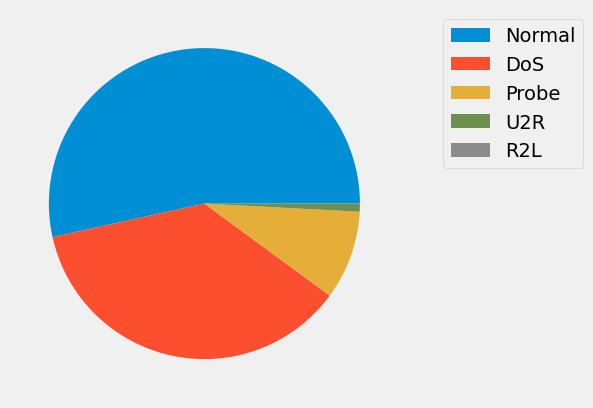

In [37]:
# 'class' feature
temp = df_train_full['class'].value_counts()
a = temp.index
b = temp.values
zipped = list(zip(a, b))
d = pd.DataFrame(zipped, columns=['class', 'occurances'])
fig.tight_layout()
fig, ax = plt.subplots()
plt.pie(data=d, x=b)
labels = ['Normal','DoS','Probe','U2R','R2L']
plt.legend(labels, bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

**Heatmap**

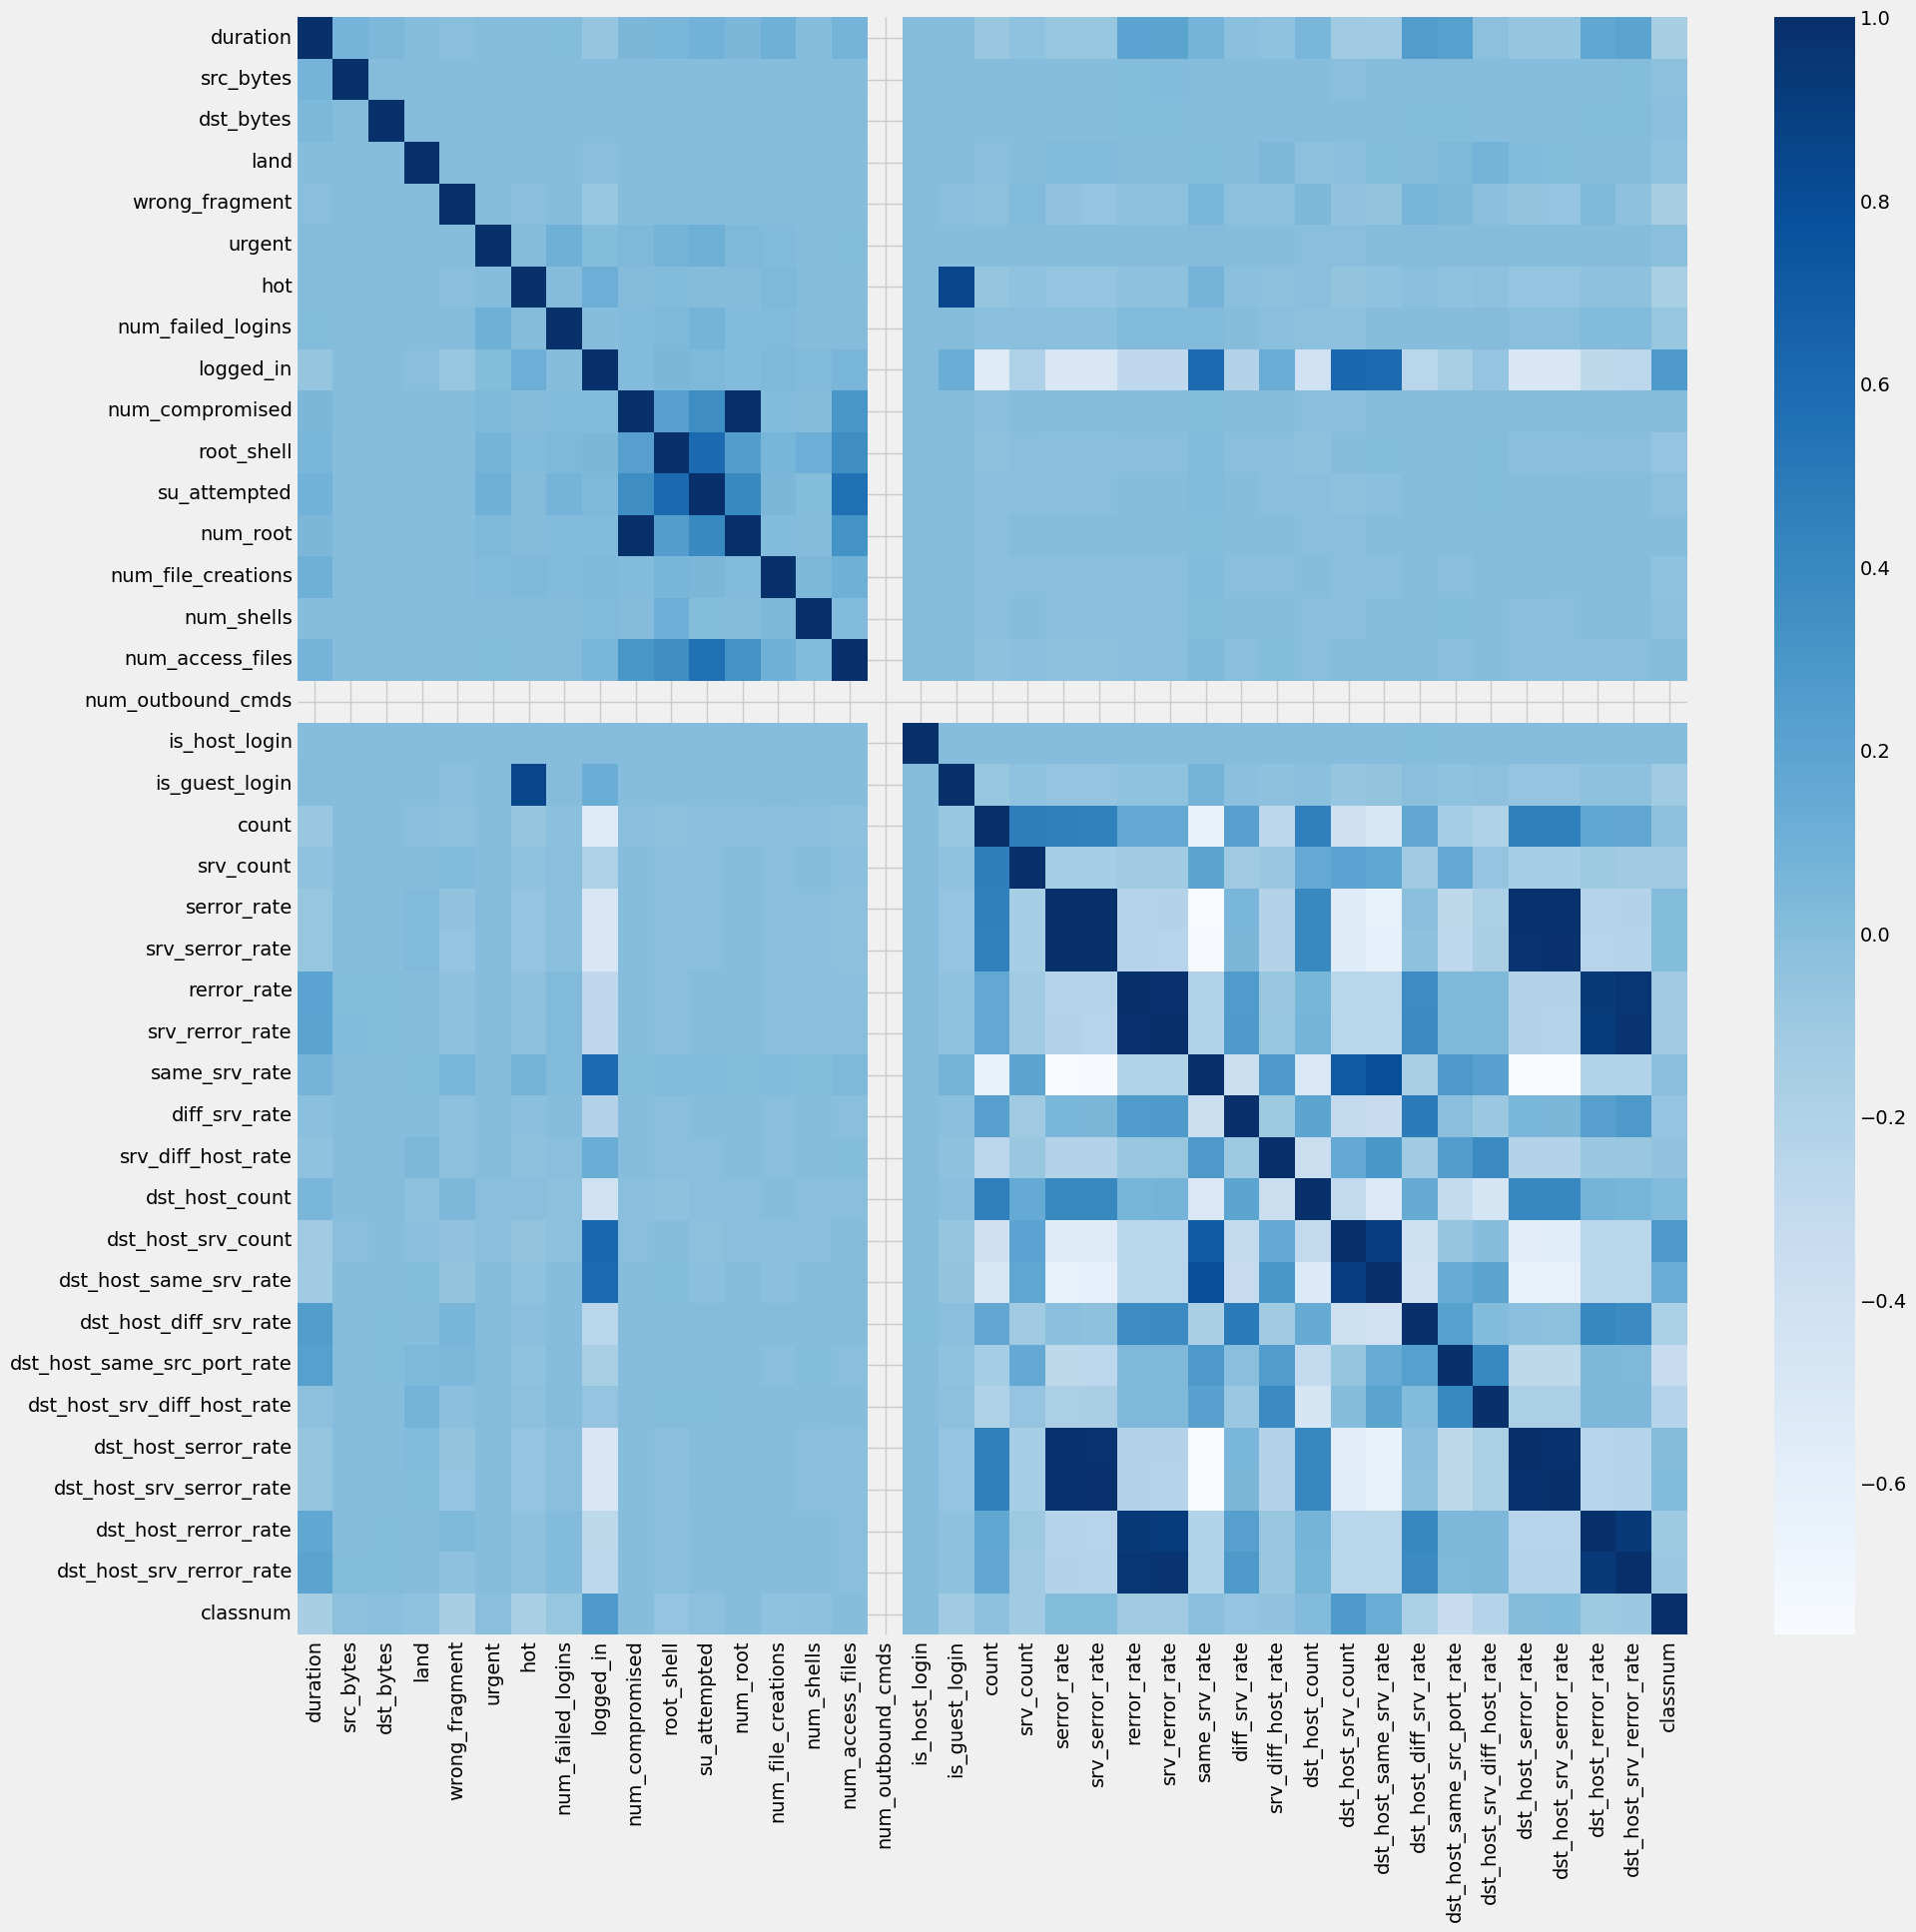

In [38]:
#obtain the correlations of each features in dataset
corr_matrix = df_train_full.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(20,20))
#plot heat map
h_map=sns.heatmap(df_train_full[top_corr_features].corr(), cmap="Blues")

# Model Building

In [39]:
df_train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [40]:
df_train_full['protocol_type'].unique()

array(['udp', 'tcp', 'icmp'], dtype=object)

In [41]:
df_train_full['service'].unique()

array(['other', 'private', 'http', 'remote_job', 'ftp_data', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [42]:
df_train_full['flag'].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [43]:
df_train_full['class'].unique()

array(['Normal', 'DoS_attack', 'R2L', 'Probe_attacks', 'U2R'],
      dtype=object)

In [44]:
protocol_type_mapping = {'udp': 0, 'tcp': 1, 'icmp': 2}
df_train_full['protocol_type'] = df_train_full['protocol_type'].map(protocol_type_mapping)

In [45]:

service_mapping = {
    'other': 0, 'private': 1, 'http': 2, 'remote_job': 3, 'ftp_data': 4,
    'name': 5, 'netbios_ns': 6, 'eco_i': 7, 'mtp': 8, 'telnet': 9, 'finger': 10,
    'domain_u': 11, 'supdup': 12, 'uucp_path': 13, 'Z39_50': 14, 'smtp': 15,
    'csnet_ns': 16, 'uucp': 17, 'netbios_dgm': 18, 'urp_i': 19, 'auth': 20,
    'domain': 21, 'ftp': 22, 'bgp': 23, 'ldap': 24, 'ecr_i': 25, 'gopher': 26,
    'vmnet': 27, 'systat': 28, 'http_443': 29, 'efs': 30, 'whois': 31, 'imap4': 32,
    'iso_tsap': 33, 'echo': 34, 'klogin': 35, 'link': 36, 'sunrpc': 37, 'login': 38,
    'kshell': 39, 'sql_net': 40, 'time': 41, 'hostnames': 42, 'exec': 43, 'ntp_u': 44,
    'discard': 45, 'nntp': 46, 'courier': 47, 'ctf': 48, 'ssh': 49, 'daytime': 50,
    'shell': 51, 'netstat': 52, 'pop_3': 53, 'nnsp': 54, 'IRC': 55, 'pop_2': 56,
    'printer': 57, 'tim_i': 58, 'pm_dump': 59, 'red_i': 60, 'netbios_ssn': 61,
    'rje': 62, 'X11': 63, 'urh_i': 64, 'http_8001': 65, 'aol': 66, 'http_2784': 67,
    'tftp_u': 68, 'harvest': 69
}


df_train_full['service'] = df_train_full['service'].map(service_mapping)


In [46]:

flag_mapping = {
    'SF': 0, 'S0': 1, 'REJ': 2, 'RSTR': 3, 'SH': 4, 'RSTO': 5, 'S1': 6, 'RSTOS0': 7,
    'S3': 8, 'S2': 9, 'OTH': 10
}

df_train_full['flag'] = df_train_full['flag'].map(flag_mapping)


In [47]:

class_mapping = {
    'Normal': 0,
    'DoS_attack': 1,
    'R2L': 2,
    'Probe_attacks': 3,
    'U2R': 4
}


df_train_full['class'] = df_train_full['class'].map(class_mapping)


In [48]:
df_train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  int64  
 2   service                      125972 non-null  int64  
 3   flag                         125972 non-null  int64  
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

# Feature Selection

In [49]:
df_train_full = df_train_full.drop(['classnum'], axis =1)

In [50]:
correlation = df_train_full.corr()['class'].abs().sort_values(ascending=False)
print(correlation)

class                          1.000000
dst_host_srv_count             0.546930
logged_in                      0.538438
dst_host_diff_srv_rate         0.480731
dst_host_same_srv_rate         0.442050
dst_host_same_src_port_rate    0.403253
flag                           0.398069
same_srv_rate                  0.394549
dst_host_srv_rerror_rate       0.346544
srv_rerror_rate                0.345622
rerror_rate                    0.343776
diff_srv_rate                  0.332773
dst_host_srv_diff_host_rate    0.323975
dst_host_rerror_rate           0.321275
count                          0.301303
protocol_type                  0.286527
dst_host_srv_serror_rate       0.248340
serror_rate                    0.246351
dst_host_serror_rate           0.245889
srv_serror_rate                0.243072
duration                       0.170237
dst_host_count                 0.121909
service                        0.105360
srv_diff_host_rate             0.091468
srv_count                      0.050995


In [143]:
X = df_train_full[
    ['dst_host_srv_count', 'logged_in', 'dst_host_diff_srv_rate', 'dst_host_same_srv_rate',
     'dst_host_same_src_port_rate', 'flag', 'same_srv_rate', 'dst_host_srv_rerror_rate',
     'srv_rerror_rate', 'rerror_rate', 'diff_srv_rate', 'dst_host_srv_diff_host_rate',
     'dst_host_rerror_rate', 'count', 'protocol_type', 'dst_host_srv_serror_rate',
     'serror_rate', 'dst_host_serror_rate', 'srv_serror_rate']
]

In [144]:
y = df_train_full['class']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [146]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# Decision Tree

In [147]:
from sklearn import tree


dt = tree.DecisionTreeClassifier(
    splitter='best',
    min_samples_split=2,
    criterion='entropy',
    max_depth=5,
    random_state=500
)

start_time = time.time()
dt.fit(X_train, y_train)
end_time = time.time()

dt_time = end_time - start_time


In [148]:
evaluate(dt, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[51474   835   129  1518     0]
 [  888 35561     0   254     0]
 [  369     1   388    38     0]
 [  435   156     0  8692     0]
 [   25     0     4    10     0]]
ACCURACY SCORE:
0.9537
CLASSIFICATION REPORT:
                      0             1           2            3     4  \
precision      0.967720      0.972861    0.744722     0.826865   0.0   
recall         0.954000      0.968885    0.487437     0.936335   0.0   
f1-score       0.960811      0.970869    0.589218     0.878202   0.0   
support    53956.000000  36703.000000  796.000000  9283.000000  39.0   

           accuracy      macro avg   weighted avg  
precision  0.953739       0.702434       0.954482  
recall     0.953739       0.669331       0.953739  
f1-score   0.953739       0.679820       0.953558  
support    0.953739  100777.000000  100777.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[12747   225    30   384     0]
 [  224  8950     0    50     0]
 [   95     0    93    11    

In [149]:
y_pred = dt.predict(X_test)
a = accuracy_score(y_test, y_pred) * 100
p = precision_score(y_test,y_pred,average='macro') * 100
r = recall_score(y_test,y_pred,average='macro') * 100
f = f1_score(y_test,y_pred,average='macro') * 100

In [150]:
conf_matrix = confusion_matrix(y_test, y_pred)


TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]


sensitivity = TP / (TP + FN)* 100


specificity = TN / (TN + FP)* 100

In [151]:
scores = cross_val_score(dt, X_train, y_train, cv=10)
print("Average accuracy:", scores.mean())

Average accuracy: 0.9530348928846217


# Logistic Regression

In [152]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=10, solver='lbfgs', max_iter=50, multi_class='auto', C=1.0)
start_time = time.time()
LR.fit(X_train, y_train)
end_time = time.time()
lr_time = end_time - start_time

In [153]:
evaluate(LR, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[52881   521     0   554     0]
 [ 2089 34495     0   119     0]
 [  781    13     0     2     0]
 [ 3696  1510     0  4077     0]
 [   38     1     0     0     0]]
ACCURACY SCORE:
0.9075
CLASSIFICATION REPORT:
                      0             1      2            3     4  accuracy  \
precision      0.888980      0.944034    0.0     0.857955   0.0  0.907479   
recall         0.980076      0.939841    0.0     0.439190   0.0  0.907479   
f1-score       0.932308      0.941933    0.0     0.580976   0.0  0.907479   
support    53956.000000  36703.000000  796.0  9283.000000  39.0  0.907479   

               macro avg   weighted avg  
precision       0.538194       0.898807  
recall          0.471822       0.907479  
f1-score        0.491044       0.895726  
support    100777.000000  100777.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[13113   131     0   142     0]
 [  572  8616     0    36     0]
 [  194     4     0     1     0]
 [  932   442     0  

In [154]:
y_pred = LR.predict(X_test)
a1 = accuracy_score(y_test, y_pred) * 100
p1 = precision_score(y_test,y_pred,average='macro') * 100
r1 = recall_score(y_test,y_pred,average='macro') * 100
f1 = f1_score(y_test,y_pred,average='macro') * 100

In [155]:
conf_matrix = confusion_matrix(y_test, y_pred)


TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]


sensitivity1 = TP / (TP + FN)* 100


specificity1 = TN / (TN + FP)* 100

In [156]:
scores1 = cross_val_score(LR, X_train, y_train, cv=10)
print("Average accuracy:", scores1.mean())

Average accuracy: 0.9076674687265666


# SVM

In [157]:
from sklearn.svm import SVC


SVM = SVC(
    random_state=50,
    max_iter=50,
    kernel='linear',
    tol=1e-4,
    decision_function_shape='ovr'
)

start_time = time.time()
SVM.fit(X_train, y_train)
end_time = time.time()

svm_time = end_time - start_time


In [158]:
evaluate(SVM, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 4712  1401  4253 15606 27984]
 [20657  3561   302 11719   464]
 [    0     0   351   442     3]
 [ 2353     6  1238  5680     6]
 [    0     0     5    34     0]]
ACCURACY SCORE:
0.1419
CLASSIFICATION REPORT:
                      0             1           2            3     4  \
precision      0.169973      0.716787    0.057082     0.169648   0.0   
recall         0.087330      0.097022    0.440955     0.611871   0.0   
f1-score       0.115380      0.170910    0.101080     0.265644   0.0   
support    53956.000000  36703.000000  796.000000  9283.000000  39.0   

           accuracy      macro avg   weighted avg  
precision  0.141937       0.222698       0.368136  
recall     0.141937       0.247436       0.141937  
f1-score   0.141937       0.130603       0.149288  
support    0.141937  100777.000000  100777.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[1125  368 1047 3970 6876]
 [5058  914   72 3057  123]
 [   0    0   86  112    1]
 [ 632    0

In [159]:
y_pred = SVM.predict(X_test)
a2 = accuracy_score(y_test, y_pred) * 100
p2 = precision_score(y_test,y_pred,average='macro') * 100
r2 = recall_score(y_test,y_pred,average='macro') * 100
f2 = f1_score(y_test,y_pred,average='macro') * 100

In [160]:
conf_matrix = confusion_matrix(y_test, y_pred)


TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]


sensitivity2 = TP / (TP + FN)* 100


specificity2 = TN / (TN + FP)* 100

In [161]:
scores2 = cross_val_score(SVM, X_train, y_train, cv=10)
print("Average accuracy:", scores2.mean())

Average accuracy: 0.22959759563604737


# GNB

In [162]:
from sklearn.naive_bayes import GaussianNB


GNB = GaussianNB(var_smoothing=1e-9)

start_time = time.time()
GNB.fit(X_train, y_train)
end_time = time.time()

gnb_time = end_time - start_time


In [163]:
evaluate(GNB, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[36601   684  3479  3037 10155]
 [ 1452 27416   101  7219   515]
 [    4     9   163    39   581]
 [  621    35     0  5350  3277]
 [    0     0     1     0    38]]
ACCURACY SCORE:
0.6903
CLASSIFICATION REPORT:
                      0             1           2            3          4  \
precision      0.946300      0.974133    0.043536     0.341962   0.002609   
recall         0.678349      0.746969    0.204774     0.576322   0.974359   
f1-score       0.790228      0.845560    0.071806     0.429236   0.005204   
support    53956.000000  36703.000000  796.000000  9283.000000  39.000000   

           accuracy      macro avg   weighted avg  
precision  0.690316       0.461708       0.893273  
recall     0.690316       0.636155       0.690316  
f1-score   0.690316       0.428407       0.771149  
support    0.690316  100777.000000  100777.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[9040  178  869  765 2534]
 [ 378 6860   22 1805  159]
 [   1    3   

In [164]:
y_pred = GNB.predict(X_test)
a3 = accuracy_score(y_test, y_pred) * 100
p3 = precision_score(y_test,y_pred,average='macro') * 100
r3 = recall_score(y_test,y_pred,average='macro') * 100
f3 = f1_score(y_test,y_pred,average='macro') * 100

In [165]:
conf_matrix = confusion_matrix(y_test, y_pred)


TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]


sensitivity3 = TP / (TP + FN)* 100


specificity3 = TN / (TN + FP)* 100

In [166]:
scores3 = cross_val_score(GNB, X_train, y_train, cv=10)
print("Average accuracy:", scores3.mean())

Average accuracy: 0.6922512884171518


# Deep Learning

# GRU

In [80]:
X = df_train_full[
    ['dst_host_srv_count', 'logged_in', 'dst_host_diff_srv_rate', 'dst_host_same_srv_rate',
     'dst_host_same_src_port_rate', 'flag', 'same_srv_rate', 'dst_host_srv_rerror_rate',
     'srv_rerror_rate', 'rerror_rate', 'diff_srv_rate', 'dst_host_srv_diff_host_rate',
     'dst_host_rerror_rate', 'count', 'protocol_type', 'dst_host_srv_serror_rate',
     'serror_rate', 'dst_host_serror_rate', 'srv_serror_rate']
]

y = df_train_full['class']

In [81]:
y_data = LabelBinarizer().fit_transform(y)

X=np.array(X)
y=np.array(y)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)
print(X_train.shape,'\n',X_test.shape)

(100777, 19) 
 (25195, 19)


In [83]:
X_train = np.reshape(X_train, ( X_train.shape[0], 1 , X_train.shape[1] ))
X_test = np.reshape(X_test, ( X_test.shape[0], 1,  X_test.shape[1] ))

In [84]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [85]:
model = Sequential()
model.add(GRU(64,return_sequences=True,input_shape = (1, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(GRU(64,return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(64,return_sequences=True))
model.add(Flatten())
model.add(Dense(units=50))
model.add(Dense(units=5,activation='softmax'))

In [86]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [87]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 64)             16320     
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 gru_1 (GRU)                 (None, 1, 64)             24960     
                                                                 
 dropout_1 (Dropout)         (None, 1, 64)             0         
                                                                 
 gru_2 (GRU)                 (None, 1, 64)             24960     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 50)                3

In [88]:
start_time = time.time()

history = model.fit(X_train, y_train, epochs=10, batch_size=64,validation_split=0.2)

end_time = time.time()
gan_time = end_time - start_time

Epoch 1/10
1260/1260 [==============================] - 18s 10ms/step - loss: 0.2264 - accuracy: 0.9357 - val_loss: 0.1267 - val_accuracy: 0.9652
Epoch 2/10
1260/1260 [==============================] - 11s 9ms/step - loss: 0.1392 - accuracy: 0.9613 - val_loss: 0.1068 - val_accuracy: 0.9706
Epoch 3/10
1260/1260 [==============================] - 11s 9ms/step - loss: 0.1217 - accuracy: 0.9655 - val_loss: 0.0904 - val_accuracy: 0.9736
Epoch 4/10
1260/1260 [==============================] - 11s 9ms/step - loss: 0.1081 - accuracy: 0.9686 - val_loss: 0.0862 - val_accuracy: 0.9773
Epoch 5/10
1260/1260 [==============================] - 11s 9ms/step - loss: 0.1003 - accuracy: 0.9706 - val_loss: 0.0785 - val_accuracy: 0.9785
Epoch 6/10
1260/1260 [==============================] - 11s 9ms/step - loss: 0.0972 - accuracy: 0.9715 - val_loss: 0.0752 - val_accuracy: 0.9767
Epoch 7/10
1260/1260 [==============================] - 11s 9ms/step - loss: 0.0914 - accuracy: 0.9727 - val_loss: 0.0687 - val_a

In [89]:
def kfold_validation(model, X_train, y_train, X_val, y_val, epochs=5, folds=10):
    results = []
    for fold in range(folds):
        print("Fold {}".format(fold))

        # Fit the model on the training data for this fold
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=64, verbose=1)

        results.append(history.history)
    return results



results = kfold_validation(model, X_train, y_train, X_test, y_test, epochs=5, folds=10)
accuracy_per_fold = [fold['val_accuracy'][-1] for fold in results]


avg_accuracy = sum(accuracy_per_fold) / len(accuracy_per_fold)

print("Average accuracy across all folds:", avg_accuracy)

accuracy_per_fold = [fold['val_accuracy'][-1] for fold in results]


avg_accuracy = sum(accuracy_per_fold) / len(accuracy_per_fold)

print("Average accuracy across all folds:", avg_accuracy)

Fold 0
Epoch 1/5
1575/1575 [==============================] - 14s 9ms/step - loss: 0.0803 - accuracy: 0.9760 - val_loss: 0.0682 - val_accuracy: 0.9796
Epoch 2/5
1575/1575 [==============================] - 13s 8ms/step - loss: 0.0783 - accuracy: 0.9758 - val_loss: 0.0855 - val_accuracy: 0.9732
Epoch 3/5
1575/1575 [==============================] - 13s 9ms/step - loss: 0.0740 - accuracy: 0.9777 - val_loss: 0.0636 - val_accuracy: 0.9821
Epoch 4/5
1575/1575 [==============================] - 13s 8ms/step - loss: 0.0730 - accuracy: 0.9775 - val_loss: 0.0658 - val_accuracy: 0.9800
Epoch 5/5
1575/1575 [==============================] - 14s 9ms/step - loss: 0.0709 - accuracy: 0.9781 - val_loss: 0.0641 - val_accuracy: 0.9816
Fold 1
Epoch 1/5
1575/1575 [==============================] - 13s 8ms/step - loss: 0.0679 - accuracy: 0.9789 - val_loss: 0.0596 - val_accuracy: 0.9827
Epoch 2/5
1575/1575 [==============================] - 15s 9ms/step - loss: 0.0689 - accuracy: 0.9787 - val_loss: 0.0601 -

In [90]:
y_pred_gru = model.predict(X_test)
y_test = np.argmax(y_test, axis=1)

y_pred_gru_classes = np.argmax(y_pred_gru, axis=1)


a5 = accuracy_score(y_test, y_pred_gru_classes) * 100
p5 = precision_score(y_test, y_pred_gru_classes, average='macro') * 100
r5 = recall_score(y_test, y_pred_gru_classes, average='macro') * 100
f5 = f1_score(y_test, y_pred_gru_classes, average='macro') * 100


conf_matrix_gru = confusion_matrix(y_test, y_pred_gru_classes)

TN_gru = conf_matrix_gru[0, 0]
FP_gru = conf_matrix_gru[0, 1]
FN_gru = conf_matrix_gru[1, 0]
TP_gru = conf_matrix_gru[1, 1]


sensitivity5 = TP_gru / (TP_gru + FN_gru)* 100
specificity5 = TN_gru / (TN_gru + FP_gru)* 100

788/788 [==============================] - 4s 3ms/step


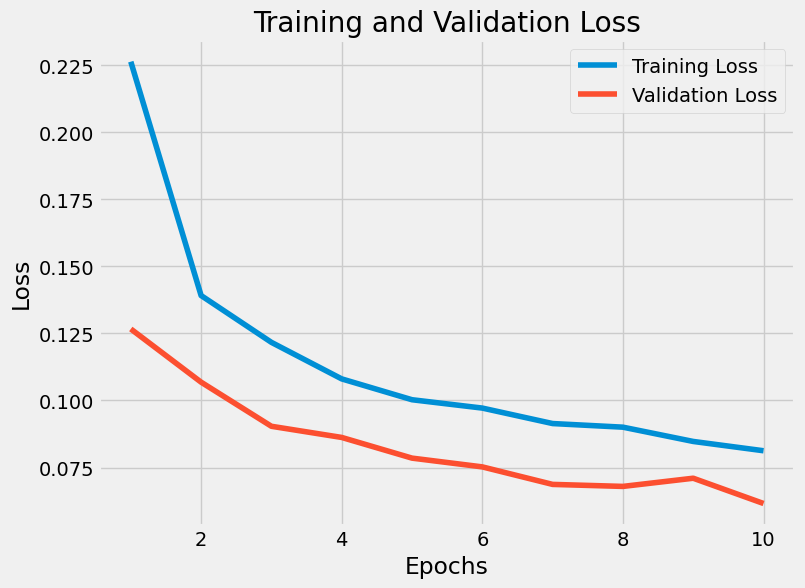

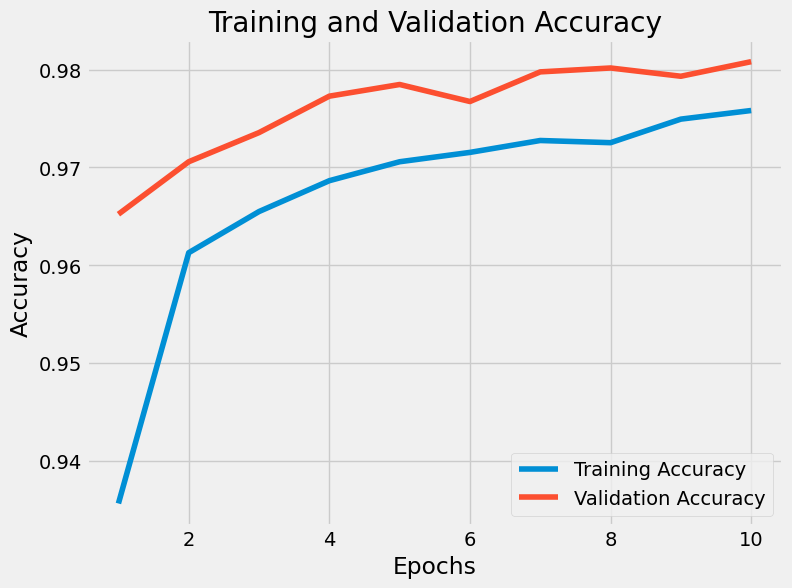

In [91]:

training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [92]:
model.save('models/gru.h5')

# LSTM

In [128]:
X = df_train_full[
    ['dst_host_srv_count', 'logged_in', 'dst_host_diff_srv_rate', 'dst_host_same_srv_rate',
     'dst_host_same_src_port_rate', 'flag', 'same_srv_rate', 'dst_host_srv_rerror_rate',
     'srv_rerror_rate', 'rerror_rate', 'diff_srv_rate', 'dst_host_srv_diff_host_rate',
     'dst_host_rerror_rate', 'count', 'protocol_type', 'dst_host_srv_serror_rate',
     'serror_rate', 'dst_host_serror_rate', 'srv_serror_rate']
]

y = df_train_full['class']



y_data = LabelBinarizer().fit_transform(y)

X=np.array(X)
y=np.array(y)



X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)
print(X_train.shape,'\n',X_test.shape)


X_train = np.reshape(X_train, ( X_train.shape[0], 1 , X_train.shape[1] ))
X_test = np.reshape(X_test, ( X_test.shape[0], 1,  X_test.shape[1] ))



y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

(100777, 19) 
 (25195, 19)


In [129]:
model = Sequential()
model.add(LSTM(64,return_sequences=True,input_shape = (1, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64,return_sequences=True))
model.add(Flatten())
model.add(Dense(units=50))

model.add(Dense(units=5,activation='softmax'))

In [130]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 1, 64)             21504     
                                                                 
 dropout_8 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 64)             33024     
                                                                 
 dropout_9 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_5 (LSTM)               (None, 1, 64)             33024     
                                                                 
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 50)               

In [131]:
start_time = time.time()

history = model.fit(X_train, y_train, epochs=10, batch_size=64,validation_split=0.2)

end_time = time.time()
lstm_time = end_time - start_time

Epoch 1/10
1260/1260 [==============================] - 20s 11ms/step - loss: 0.2478 - accuracy: 0.9315 - val_loss: 0.1285 - val_accuracy: 0.9632
Epoch 2/10
1260/1260 [==============================] - 11s 9ms/step - loss: 0.1377 - accuracy: 0.9620 - val_loss: 0.1121 - val_accuracy: 0.9698
Epoch 3/10
1260/1260 [==============================] - 11s 9ms/step - loss: 0.1194 - accuracy: 0.9662 - val_loss: 0.0946 - val_accuracy: 0.9722
Epoch 4/10
1260/1260 [==============================] - 11s 9ms/step - loss: 0.1067 - accuracy: 0.9695 - val_loss: 0.0857 - val_accuracy: 0.9747
Epoch 5/10
1260/1260 [==============================] - 12s 10ms/step - loss: 0.0996 - accuracy: 0.9711 - val_loss: 0.0743 - val_accuracy: 0.9777
Epoch 6/10
1260/1260 [==============================] - 12s 9ms/step - loss: 0.0926 - accuracy: 0.9723 - val_loss: 0.0766 - val_accuracy: 0.9776
Epoch 7/10
1260/1260 [==============================] - 12s 10ms/step - loss: 0.0882 - accuracy: 0.9731 - val_loss: 0.0747 - val

In [132]:
def kfold_validation(model, X_train, y_train, X_val, y_val, epochs=5, folds=10):
    results = []
    for fold in range(folds):
        print("Fold {}".format(fold))

        # Fit the model on the training data for this fold
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=64, verbose=1)

        results.append(history.history)
    return results



results = kfold_validation(model, X_train, y_train, X_test, y_test, epochs=5, folds=10)
accuracy_per_fold = [fold['val_accuracy'][-1] for fold in results]


avg_accuracy = sum(accuracy_per_fold) / len(accuracy_per_fold)

print("Average accuracy across all folds:", avg_accuracy)

accuracy_per_fold = [fold['val_accuracy'][-1] for fold in results]


avg_accuracy1 = sum(accuracy_per_fold) / len(accuracy_per_fold)

print("Average accuracy across all folds:", avg_accuracy1)

Fold 0
Epoch 1/5
1575/1575 [==============================] - 14s 9ms/step - loss: 0.0761 - accuracy: 0.9767 - val_loss: 0.0679 - val_accuracy: 0.9793
Epoch 2/5
1575/1575 [==============================] - 14s 9ms/step - loss: 0.0747 - accuracy: 0.9773 - val_loss: 0.0678 - val_accuracy: 0.9800
Epoch 3/5
1575/1575 [==============================] - 14s 9ms/step - loss: 0.0726 - accuracy: 0.9781 - val_loss: 0.0645 - val_accuracy: 0.9801
Epoch 4/5
1575/1575 [==============================] - 14s 9ms/step - loss: 0.0710 - accuracy: 0.9780 - val_loss: 0.0628 - val_accuracy: 0.9817
Epoch 5/5
1575/1575 [==============================] - 14s 9ms/step - loss: 0.0691 - accuracy: 0.9787 - val_loss: 0.0643 - val_accuracy: 0.9822
Fold 1
Epoch 1/5
1575/1575 [==============================] - 14s 9ms/step - loss: 0.0670 - accuracy: 0.9793 - val_loss: 0.0581 - val_accuracy: 0.9829
Epoch 2/5
1575/1575 [==============================] - 14s 9ms/step - loss: 0.0669 - accuracy: 0.9789 - val_loss: 0.0647 -

In [133]:
y_pred_lstm = model.predict(X_test)
y_test = np.argmax(y_test, axis=1)

y_pred_lstm_classes = np.argmax(y_pred_lstm, axis=1)


a6 = accuracy_score(y_test, y_pred_lstm_classes) * 100
p6 = precision_score(y_test, y_pred_lstm_classes, average='macro') * 100
r6 = recall_score(y_test, y_pred_lstm_classes, average='macro') * 100
f6 = f1_score(y_test, y_pred_lstm_classes, average='macro') * 100

conf_matrix_gru = confusion_matrix(y_test, y_pred_lstm_classes)

TN = conf_matrix_gru[0, 0]
FP = conf_matrix_gru[0, 1]
FN = conf_matrix_gru[1, 0]
TP = conf_matrix_gru[1, 1]


sensitivity6 = TP / (TP + FN)* 100
specificity6 = TN / (TN + FP)* 100

788/788 [==============================] - 3s 3ms/step


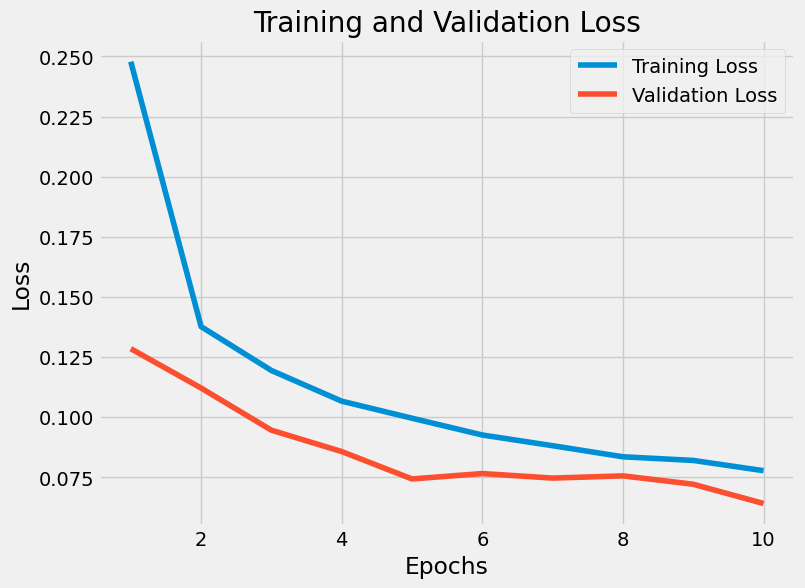

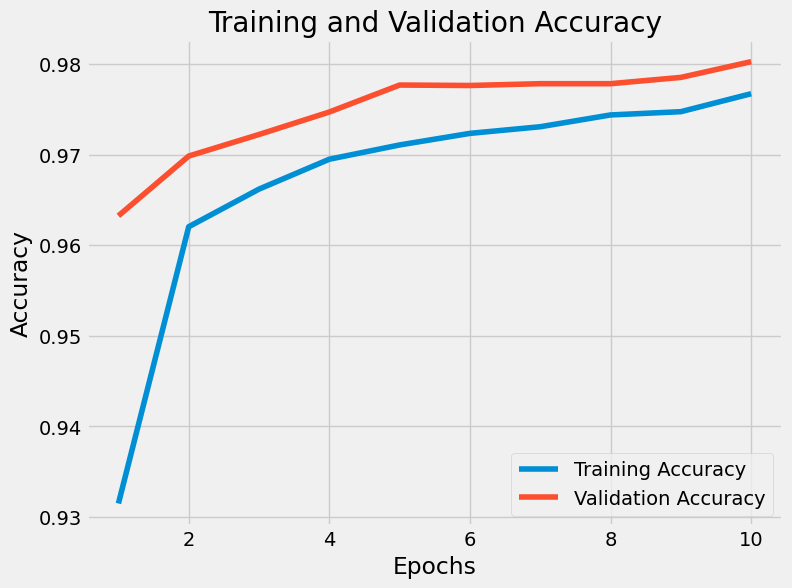

In [134]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [135]:
model.save('models/lstm.h5')

# RNN

In [101]:
X = df_train_full[
    ['dst_host_srv_count', 'logged_in', 'dst_host_diff_srv_rate', 'dst_host_same_srv_rate',
     'dst_host_same_src_port_rate', 'flag', 'same_srv_rate', 'dst_host_srv_rerror_rate',
     'srv_rerror_rate', 'rerror_rate', 'diff_srv_rate', 'dst_host_srv_diff_host_rate',
     'dst_host_rerror_rate', 'count', 'protocol_type', 'dst_host_srv_serror_rate',
     'serror_rate', 'dst_host_serror_rate', 'srv_serror_rate']
]

y = df_train_full['class']



y_data = LabelBinarizer().fit_transform(y)

X=np.array(X)
y=np.array(y)



X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)
print(X_train.shape,'\n',X_test.shape)


X_train = np.reshape(X_train, ( X_train.shape[0], 1 , X_train.shape[1] ))
X_test = np.reshape(X_test, ( X_test.shape[0], 1,  X_test.shape[1] ))



y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

(100777, 19) 
 (25195, 19)


In [102]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True,input_shape = (1, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(SimpleRNN(64,return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(64,return_sequences=True))
model.add(Flatten())
model.add(Dense(units=50))
model.add(Dense(units=5,activation='softmax'))

In [103]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 64)             5376      
                                                                 
 dropout_4 (Dropout)         (None, 1, 64)             0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 1, 64)             8256      
                                                                 
 dropout_5 (Dropout)         (None, 1, 64)             0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 1, 64)             8256      
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 50)               

In [104]:
start_time = time.time()

history = model.fit(X_train, y_train, epochs=10, batch_size=64,validation_split=0.2)

end_time = time.time()
rnn_time = end_time - start_time

Epoch 1/10
1260/1260 [==============================] - 11s 6ms/step - loss: 0.2628 - accuracy: 0.9220 - val_loss: 0.1769 - val_accuracy: 0.9501
Epoch 2/10
1260/1260 [==============================] - 8s 6ms/step - loss: 0.1631 - accuracy: 0.9531 - val_loss: 0.1205 - val_accuracy: 0.9676
Epoch 3/10
1260/1260 [==============================] - 6s 5ms/step - loss: 0.1399 - accuracy: 0.9595 - val_loss: 0.1161 - val_accuracy: 0.9631
Epoch 4/10
1260/1260 [==============================] - 7s 6ms/step - loss: 0.1259 - accuracy: 0.9634 - val_loss: 0.0960 - val_accuracy: 0.9726
Epoch 5/10
1260/1260 [==============================] - 7s 6ms/step - loss: 0.1159 - accuracy: 0.9659 - val_loss: 0.0908 - val_accuracy: 0.9727
Epoch 6/10
1260/1260 [==============================] - 8s 6ms/step - loss: 0.1083 - accuracy: 0.9675 - val_loss: 0.0894 - val_accuracy: 0.9731
Epoch 7/10
1260/1260 [==============================] - 7s 6ms/step - loss: 0.1072 - accuracy: 0.9676 - val_loss: 0.0822 - val_accuracy

In [105]:
def kfold_validation(model, X_train, y_train, X_val, y_val, epochs=5, folds=10):
    results = []
    for fold in range(folds):
        print("Fold {}".format(fold))

        # Fit the model on the training data for this fold
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=64, verbose=1)

        results.append(history.history)
    return results



results = kfold_validation(model, X_train, y_train, X_test, y_test, epochs=5, folds=10)
accuracy_per_fold = [fold['val_accuracy'][-1] for fold in results]


avg_accuracy = sum(accuracy_per_fold) / len(accuracy_per_fold)

print("Average accuracy across all folds:", avg_accuracy)

accuracy_per_fold = [fold['val_accuracy'][-1] for fold in results]


avg_accuracy2 = sum(accuracy_per_fold) / len(accuracy_per_fold)

print("Average accuracy across all folds:", avg_accuracy2)

Fold 0
Epoch 1/5
1575/1575 [==============================] - 10s 6ms/step - loss: 0.0889 - accuracy: 0.9727 - val_loss: 0.0719 - val_accuracy: 0.9794
Epoch 2/5
1575/1575 [==============================] - 10s 7ms/step - loss: 0.0876 - accuracy: 0.9735 - val_loss: 0.0732 - val_accuracy: 0.9784
Epoch 3/5
1575/1575 [==============================] - 9s 5ms/step - loss: 0.0848 - accuracy: 0.9743 - val_loss: 0.0761 - val_accuracy: 0.9754
Epoch 4/5
1575/1575 [==============================] - 9s 6ms/step - loss: 0.0827 - accuracy: 0.9744 - val_loss: 0.0671 - val_accuracy: 0.9805
Epoch 5/5
1575/1575 [==============================] - 9s 6ms/step - loss: 0.0794 - accuracy: 0.9751 - val_loss: 0.0787 - val_accuracy: 0.9766
Fold 1
Epoch 1/5
1575/1575 [==============================] - 9s 6ms/step - loss: 0.0804 - accuracy: 0.9755 - val_loss: 0.0702 - val_accuracy: 0.9795
Epoch 2/5
1575/1575 [==============================] - 8s 5ms/step - loss: 0.0781 - accuracy: 0.9755 - val_loss: 0.0659 - val_

In [112]:
y_pred_rnn = model.predict(X_test)
y_test = np.argmax(y_test, axis=1)

y_pred_rnn_classes = np.argmax(y_pred_rnn, axis=1)


a7 = accuracy_score(y_test, y_pred_rnn_classes) * 100
p7 = precision_score(y_test, y_pred_rnn_classes, average='macro') * 100
r7 = recall_score(y_test, y_pred_rnn_classes, average='macro') * 100
f7 = f1_score(y_test, y_pred_rnn_classes, average='macro') * 100

conf_matrix_gru = confusion_matrix(y_test, y_pred_rnn_classes)

TN = conf_matrix_gru[0, 0]
FP = conf_matrix_gru[0, 1]
FN = conf_matrix_gru[1, 0]
TP = conf_matrix_gru[1, 1]


sensitivity7 = TP / (TP + FN)* 100
specificity7 = TN / (TN + FP)* 100

788/788 [==============================] - 3s 4ms/step


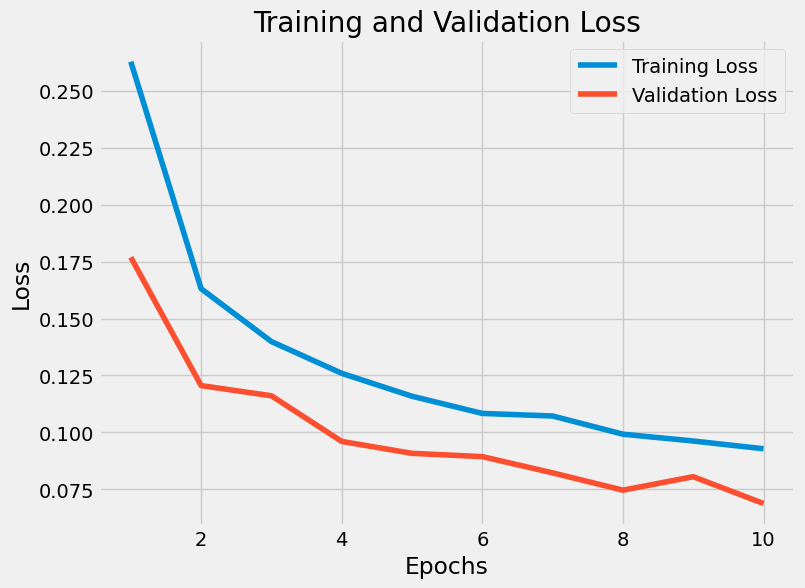

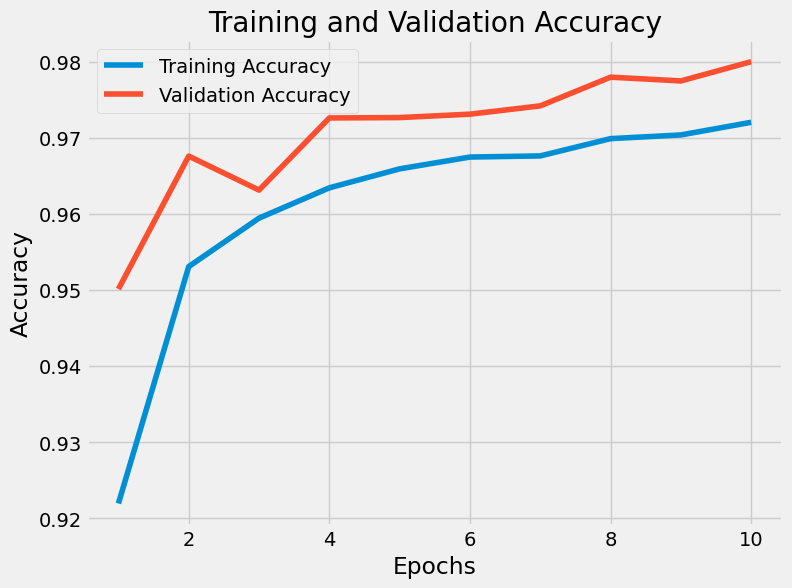

In [111]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [113]:
model.save('models/rnn.h5')

# CNN

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [115]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(25195, 19, 1)

In [116]:
y_train = LabelBinarizer().fit_transform(y_train)
y_train
y_test = LabelBinarizer().fit_transform(y_test)
y_test

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [117]:
model = Sequential()
model.add(Conv1D(32, 3, padding="same",input_shape = (X_train.shape[1], 1), activation='relu'))
model.add(MaxPool1D(pool_size=(4)))
model.add(Dropout(0.2))
model.add(Conv1D(32, 3, padding="same", activation='relu'))
model.add(MaxPool1D(pool_size=(4)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=50))
model.add(Dense(units=5,activation='softmax'))

In [118]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 19, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 4, 32)             0         
 D)                                                              
                                                                 
 dropout_6 (Dropout)         (None, 4, 32)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 4, 32)             3104      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 32)             0         
 g1D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 1, 32)            

In [119]:
start_time = time.time()

history = model.fit(X_train, y_train, epochs=10, batch_size=64,validation_split=0.2)

end_time = time.time()
cnn_time = end_time - start_time

Epoch 1/10
1260/1260 [==============================] - 17s 11ms/step - loss: 0.7390 - accuracy: 0.8214 - val_loss: 0.4909 - val_accuracy: 0.8579
Epoch 2/10
1260/1260 [==============================] - 13s 10ms/step - loss: 0.4367 - accuracy: 0.8665 - val_loss: 0.2861 - val_accuracy: 0.9188
Epoch 3/10
1260/1260 [==============================] - 6s 5ms/step - loss: 0.3267 - accuracy: 0.8962 - val_loss: 0.2391 - val_accuracy: 0.9267
Epoch 4/10
1260/1260 [==============================] - 7s 6ms/step - loss: 0.2862 - accuracy: 0.9083 - val_loss: 0.1950 - val_accuracy: 0.9340
Epoch 5/10
1260/1260 [==============================] - 6s 5ms/step - loss: 0.2463 - accuracy: 0.9207 - val_loss: 0.1856 - val_accuracy: 0.9405
Epoch 6/10
1260/1260 [==============================] - 7s 5ms/step - loss: 0.2259 - accuracy: 0.9287 - val_loss: 0.1608 - val_accuracy: 0.9497
Epoch 7/10
1260/1260 [==============================] - 6s 5ms/step - loss: 0.2152 - accuracy: 0.9326 - val_loss: 0.1589 - val_accur

In [120]:
def kfold_validation(model, X_train, y_train, X_val, y_val, epochs=5, folds=10):
    results = []
    for fold in range(folds):
        print("Fold {}".format(fold))

        # Fit the model on the training data for this fold
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=64, verbose=1)

        results.append(history.history)
    return results



results = kfold_validation(model, X_train, y_train, X_test, y_test, epochs=5, folds=10)
accuracy_per_fold = [fold['val_accuracy'][-1] for fold in results]


avg_accuracy = sum(accuracy_per_fold) / len(accuracy_per_fold)

print("Average accuracy across all folds:", avg_accuracy)

accuracy_per_fold = [fold['val_accuracy'][-1] for fold in results]


avg_accuracy3 = sum(accuracy_per_fold) / len(accuracy_per_fold)

print("Average accuracy across all folds:", avg_accuracy3)

Fold 0
Epoch 1/5
1575/1575 [==============================] - 9s 5ms/step - loss: 0.1714 - accuracy: 0.9476 - val_loss: 0.1240 - val_accuracy: 0.9605
Epoch 2/5
1575/1575 [==============================] - 9s 5ms/step - loss: 0.1648 - accuracy: 0.9494 - val_loss: 0.1181 - val_accuracy: 0.9642
Epoch 3/5
1575/1575 [==============================] - 8s 5ms/step - loss: 0.1596 - accuracy: 0.9515 - val_loss: 0.1137 - val_accuracy: 0.9655
Epoch 4/5
1575/1575 [==============================] - 8s 5ms/step - loss: 0.1553 - accuracy: 0.9526 - val_loss: 0.1088 - val_accuracy: 0.9675
Epoch 5/5
1575/1575 [==============================] - 8s 5ms/step - loss: 0.1514 - accuracy: 0.9531 - val_loss: 0.1193 - val_accuracy: 0.9607
Fold 1
Epoch 1/5
1575/1575 [==============================] - 9s 5ms/step - loss: 0.1494 - accuracy: 0.9542 - val_loss: 0.1081 - val_accuracy: 0.9674
Epoch 2/5
1575/1575 [==============================] - 9s 6ms/step - loss: 0.1475 - accuracy: 0.9547 - val_loss: 0.1020 - val_ac

In [121]:
y_pred_cnn = model.predict(X_test)
y_test = np.argmax(y_test, axis=1)

y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)


a8 = accuracy_score(y_test, y_pred_cnn_classes) * 100
p8 = precision_score(y_test, y_pred_cnn_classes, average='macro') * 100
r8 = recall_score(y_test, y_pred_cnn_classes, average='macro') * 100
f8 = f1_score(y_test, y_pred_cnn_classes, average='macro') * 100

conf_matrix_gru = confusion_matrix(y_test, y_pred_cnn_classes)

TN = conf_matrix_gru[0, 0]
FP = conf_matrix_gru[0, 1]
FN = conf_matrix_gru[1, 0]
TP = conf_matrix_gru[1, 1]


sensitivity8 = TP / (TP + FN)* 100
specificity8 = TN / (TN + FP)* 100

788/788 [==============================] - 2s 2ms/step


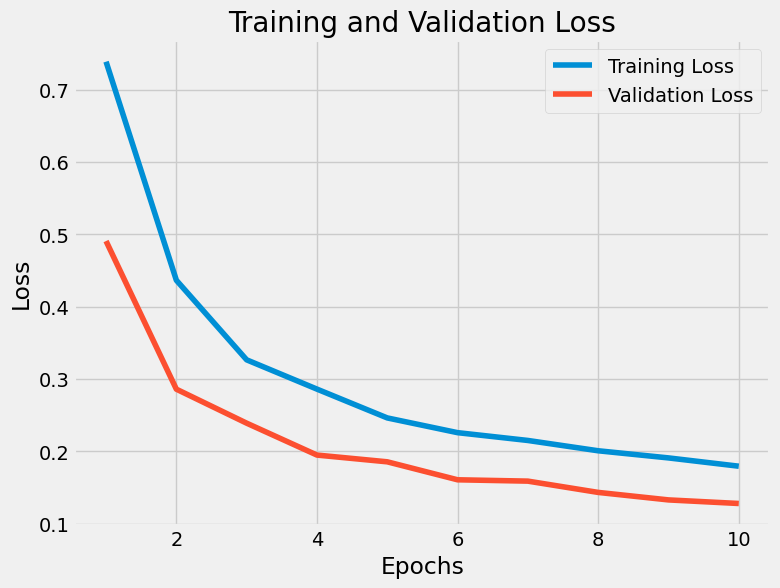

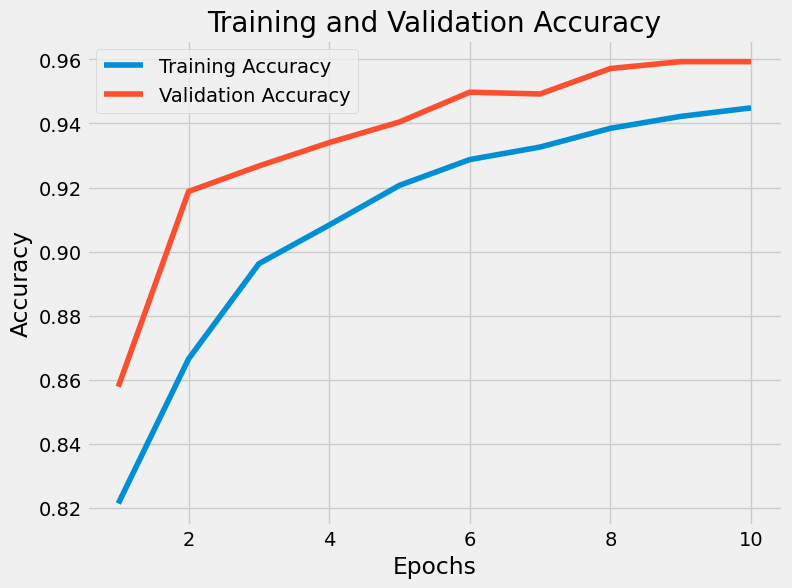

In [122]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [123]:
model.save('models/cnn.h5')

# Comparison

In [195]:
results ={'accuracy': [a,a1,a2,a3,a5,a6,a7,a8],
         'precision' : [p,p1,p2,p3,p5,p6,p7,p8],
         'f1':[f,f1,f2,f3,f5,f6,f7,f8],
         'recall':[r,r1,r2,r3,r5,r6,r7,r8,],
         'sensitivity':[sensitivity,sensitivity1,sensitivity2,sensitivity3,sensitivity5,sensitivity6,sensitivity7,sensitivity8],
         'specificity':[specificity,specificity1,specificity2,specificity3,specificity5,specificity6,specificity7,specificity8],}
index = ['Decision Tree','Logistic Regression','SVM','Gaussian Naive Bayes','GRU','LSTM','RNN','CNN']

In [196]:
results =pd.DataFrame(results,index=index)

In [177]:
print(results)

                       accuracy  precision         f1     recall  sensitivity  \
Decision Tree         95.336376  70.186724  67.715002  66.592677    97.558317   
Logistic Regression   90.208375  53.396384  48.559363  46.693533    93.774488   
SVM                   14.054376  21.989918  12.874339  24.240124    15.304756   
Gaussian Naive Bayes  68.779520  46.208900  42.779500  62.191868    94.777563   
GRU                   98.654495  72.935717  74.018918  75.251725    99.337605   
LSTM                  98.765628  74.384986  74.783166  75.194744    99.207469   
RNN                   98.543362  76.799996  72.906212  70.491976    99.197049   
CNN                   97.983727  75.900331  71.622521  68.963413    99.043270   

                      specificity  
Decision Tree           98.265495  
Logistic Regression     99.010873  
SVM                     75.351641  
Gaussian Naive Bayes    98.068995  
GRU                     99.660557  
LSTM                    99.856809  
RNN               

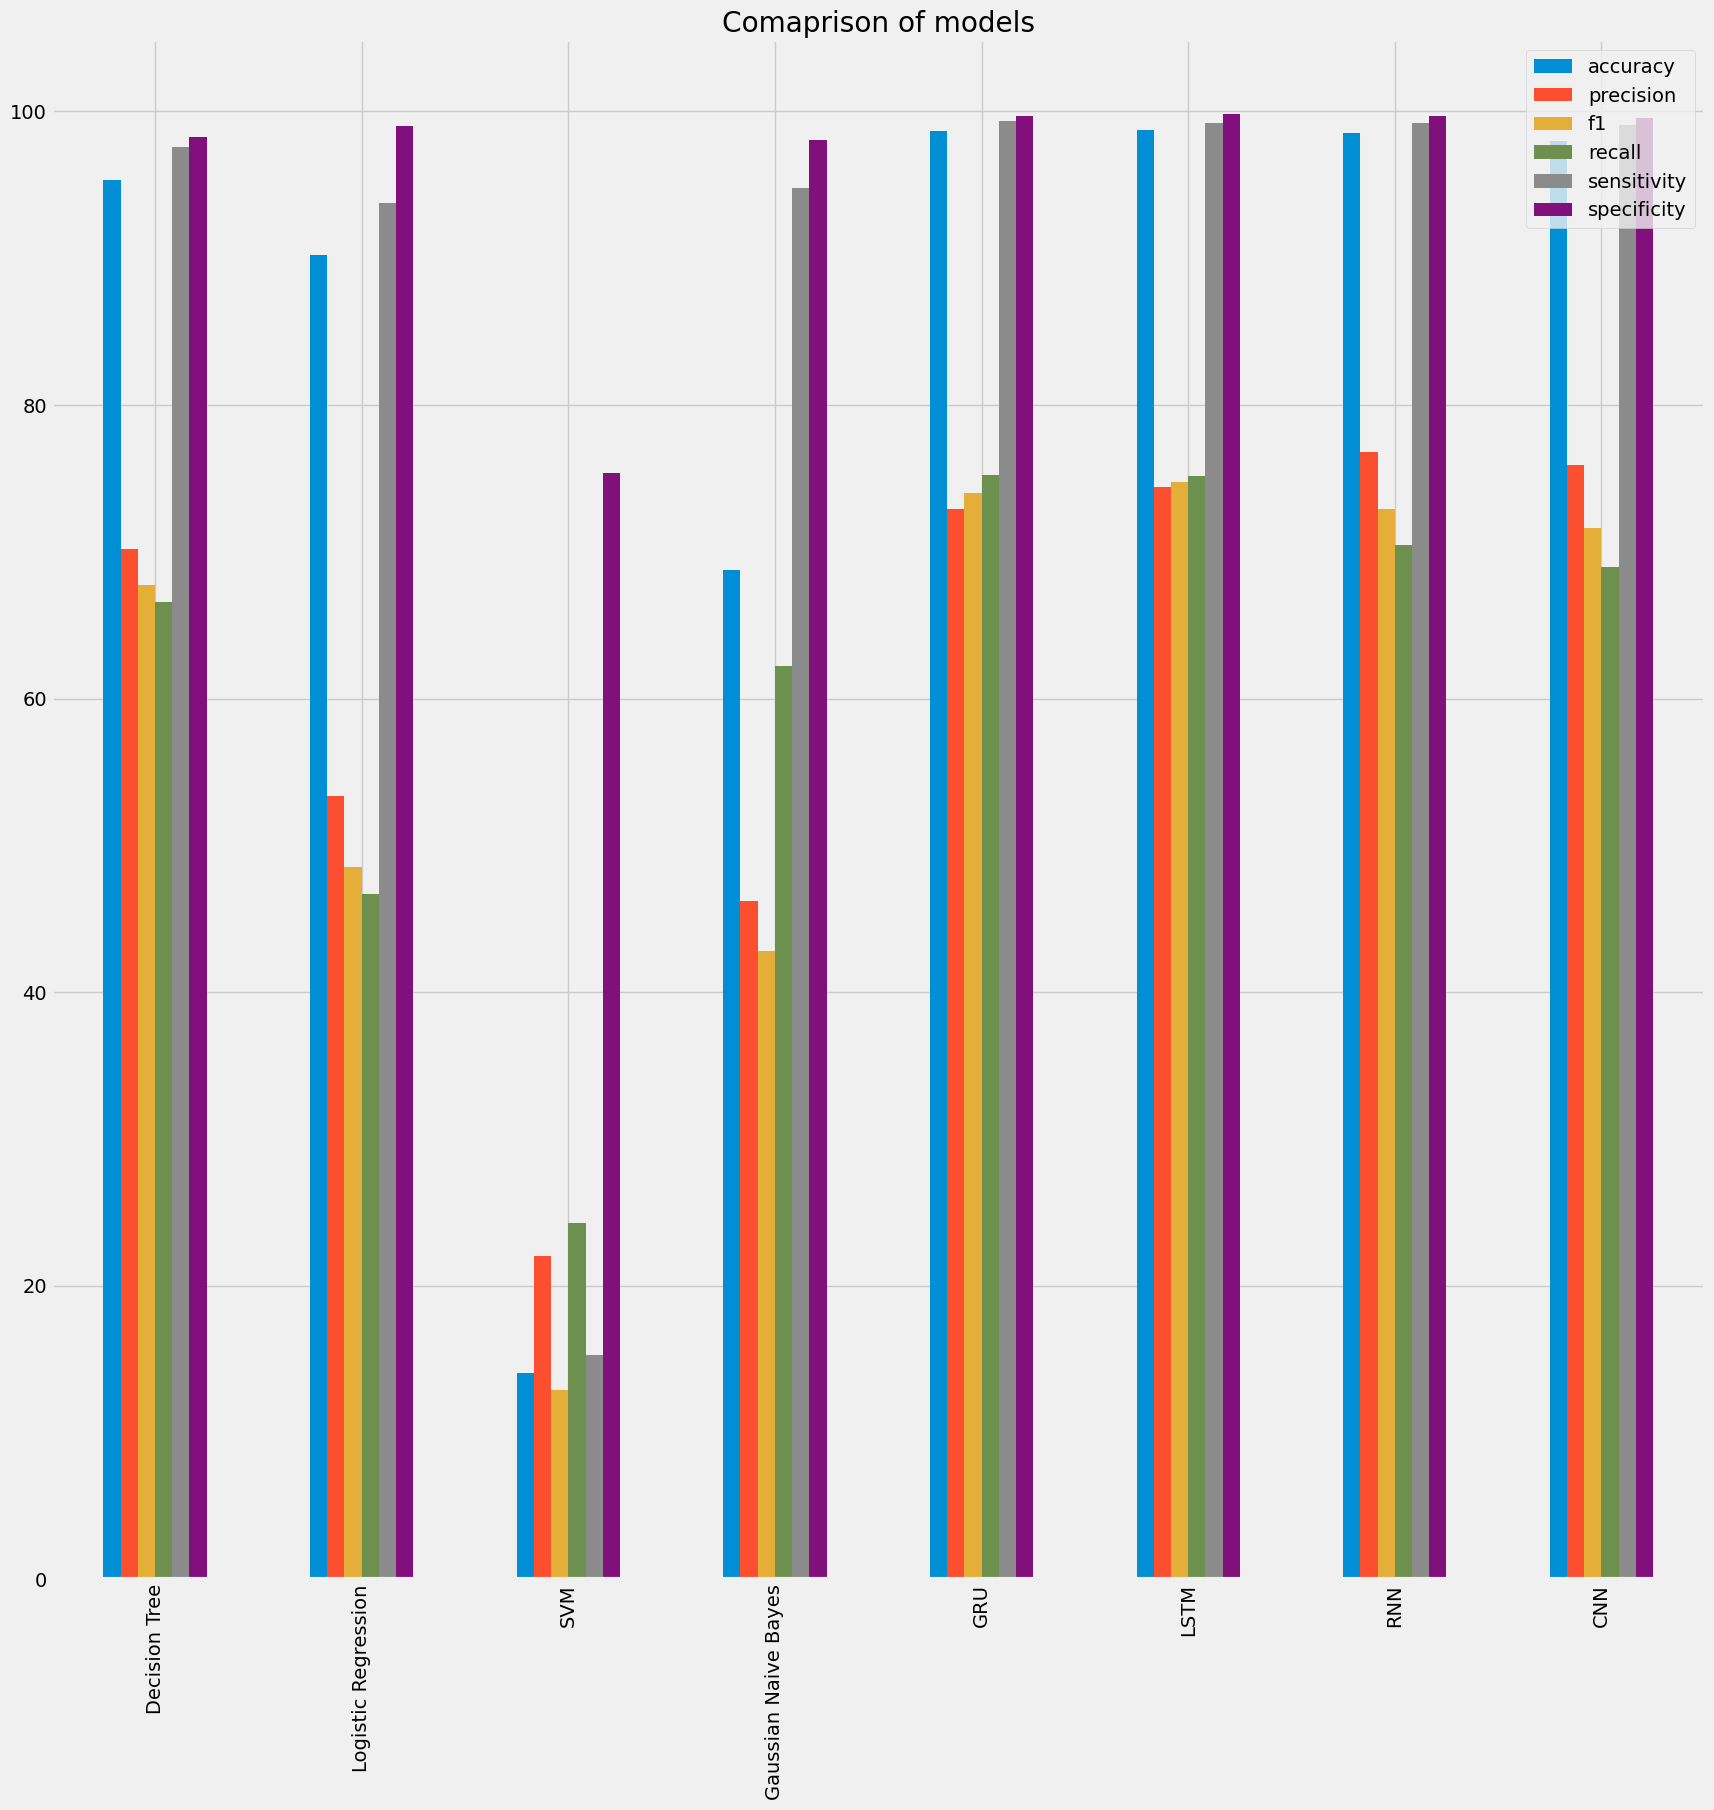

In [197]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(19,19)).get_figure()
fig.savefig('Final Result.png')

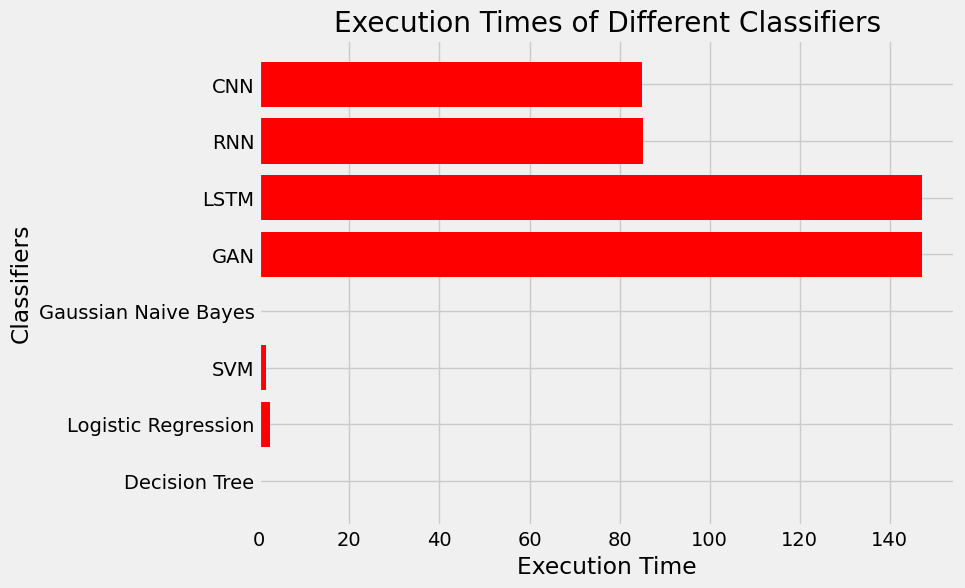

In [198]:
classifiers = ['Decision Tree','Logistic Regression','SVM','Gaussian Naive Bayes','GAN','LSTM','RNN','CNN']
execution_times = [dt_time,lr_time,svm_time,gnb_time,gan_time,lstm_time,rnn_time,cnn_time]
plt.figure(figsize=(8, 6))
plt.barh(classifiers, execution_times, color='red')
plt.xlabel('Execution Time')
plt.ylabel('Classifiers')
plt.title('Execution Times of Different Classifiers')
plt.show()

In [199]:
results ={'cross accuracy': [scores.mean(), scores1.mean(), scores2.mean(), scores3.mean(), avg_accuracy, avg_accuracy1, avg_accuracy2, avg_accuracy3]}
index = ['Decision Tree','Logistic Regression','SVM','Gaussian Naive Bayes','GRU','LSTM','RNN','CNN']

In [200]:
results =pd.DataFrame(results,index=index)

In [201]:
print(results)

                      cross accuracy
Decision Tree               0.953035
Logistic Regression         0.907667
SVM                         0.229598
Gaussian Naive Bayes        0.692251
GRU                         0.984838
LSTM                        0.984838
RNN                         0.982227
CNN                         0.975273


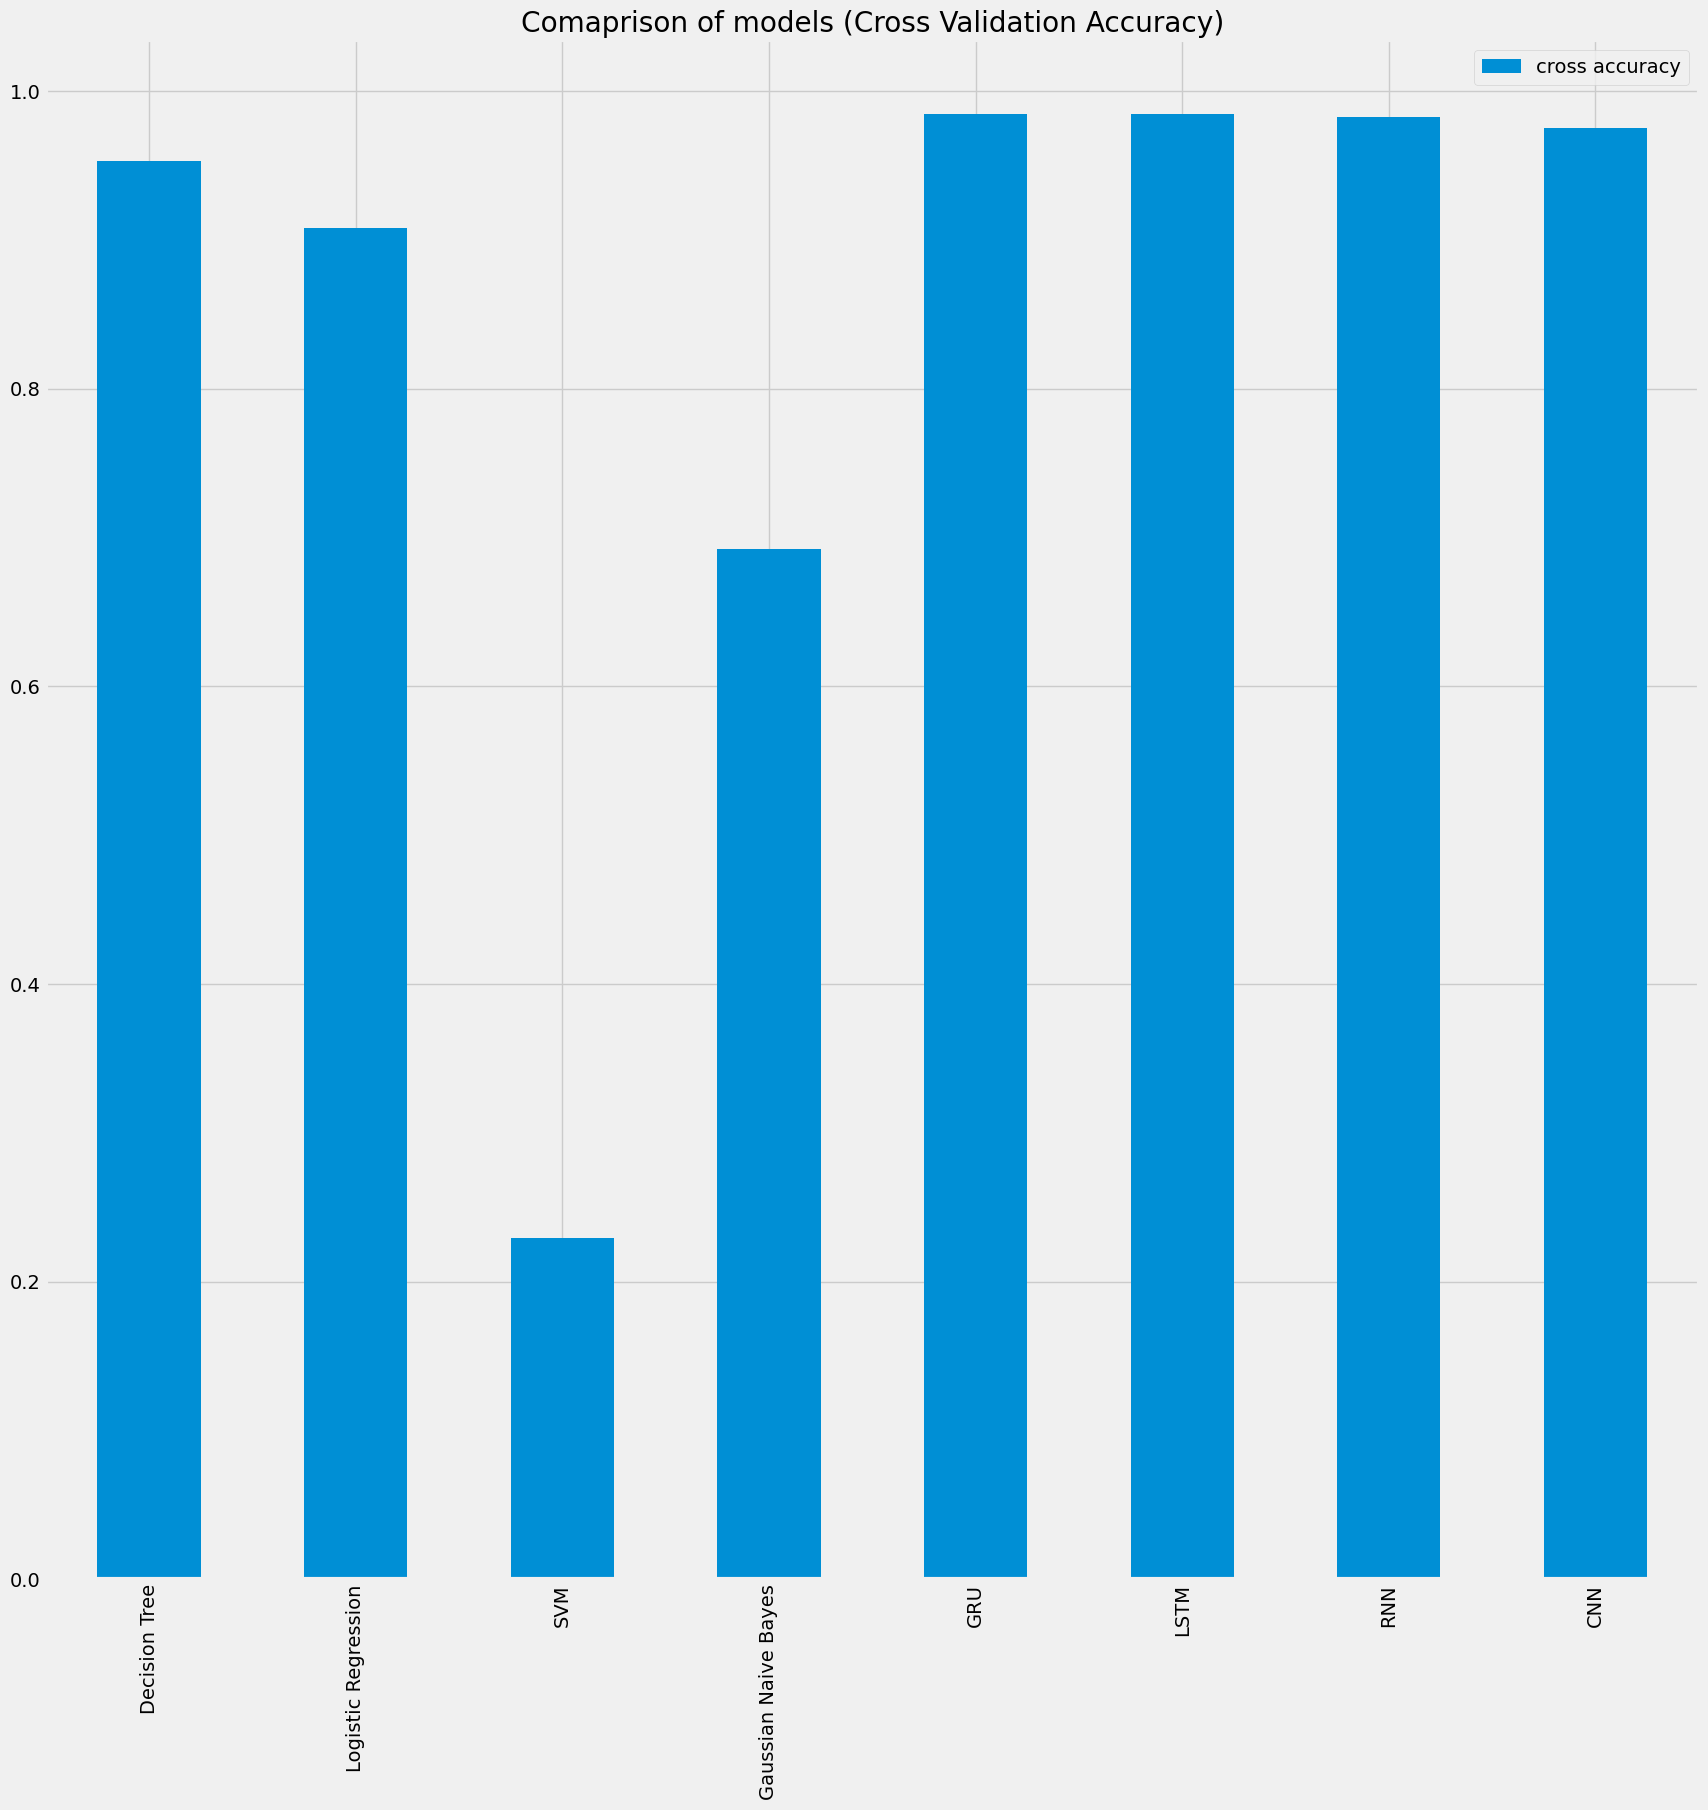

In [202]:
fig =results.plot(kind='bar',title='Comaprison of models (Cross Validation Accuracy)',figsize =(19,19)).get_figure()
fig.savefig('Final1 Result.png')